# **Exploratory Data Analysis (EDA) for Machine Learning**

---

## **1. Introduction to EDA**

### **What is EDA?**
Exploratory Data Analysis (EDA) is a process to summarize, visualize, and understand datasets. It helps identify data issues, patterns, relationships, and insights that guide the machine learning process.

### **Why is EDA Important?**
- **Data Quality**: Detect missing values, outliers, or inconsistencies.
- **Feature Engineering**: Understand how features interact and influence the target variable.
- **Model Selection**: Inform which algorithms and preprocessing steps might work best.

### **Key Objectives**
1. Detect missing data.
2. Understand distributions of features.
3. Explore relationships between features and the target variable.

---

## **2. Dataset Overview**

We'll use the **Iris Dataset** from scikit-learn for this example. This dataset includes numerical features and a categorical target variable.

### **Loading and Exploring the Dataset**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
# Map target to class names
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [4]:
# Basic dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Check if there null values
df.isnull().sum().sum()

0

In [8]:
# Check if there Duplicated
df.duplicated().sum()

1

In [9]:
# There just one duplicated we can remove it
df.drop_duplicates(inplace=True)

---

## **3. Target Variable Analysis**

### **Analyzing the Target Variable**
Understanding the distribution of the target variable is critical for classification tasks.

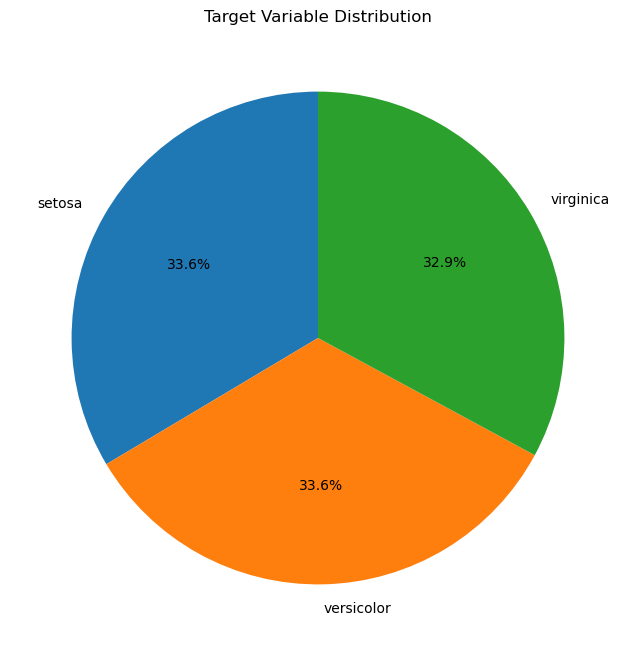

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Pie chart for target variable
df['target'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Target Variable Distribution')
plt.ylabel('')  # Remove y-label for aesthetics
plt.show()

### **Discussion**
- If the target variable is imbalanced, resampling techniques (e.g., SMOTE, oversampling, or undersampling) or weighted loss functions may be required.

---

## **4. Feature Analysis**

### **Analyzing Numerical Features**
Explore the distributions of numerical features using histograms and KDE plots.

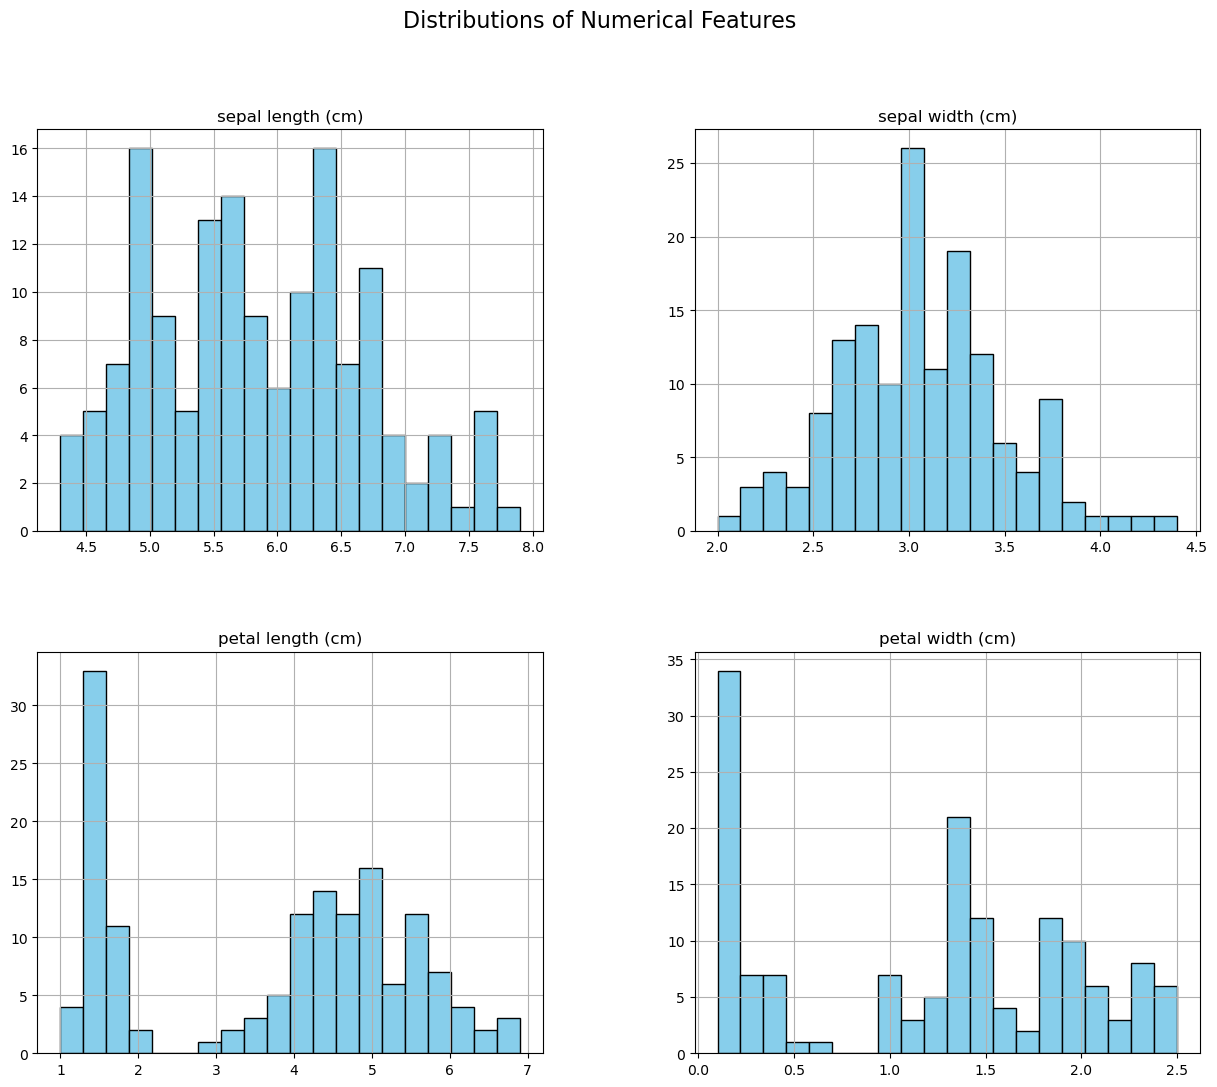

In [11]:
# Histograms for all numerical features
df[iris.feature_names].hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()

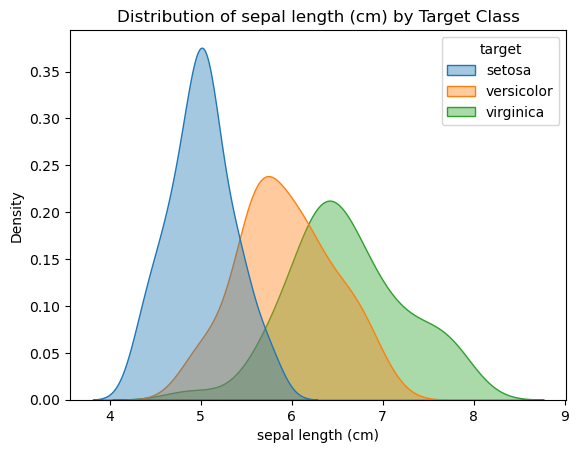

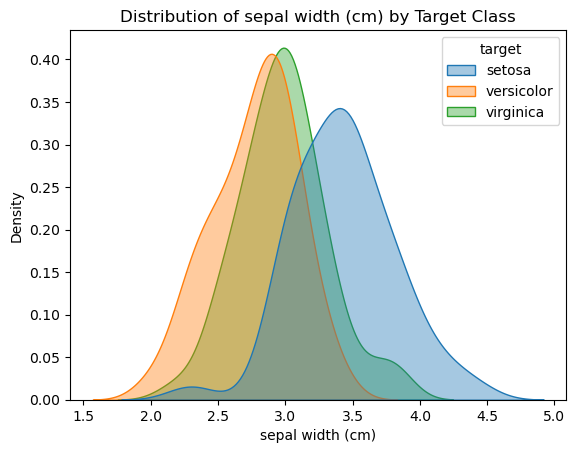

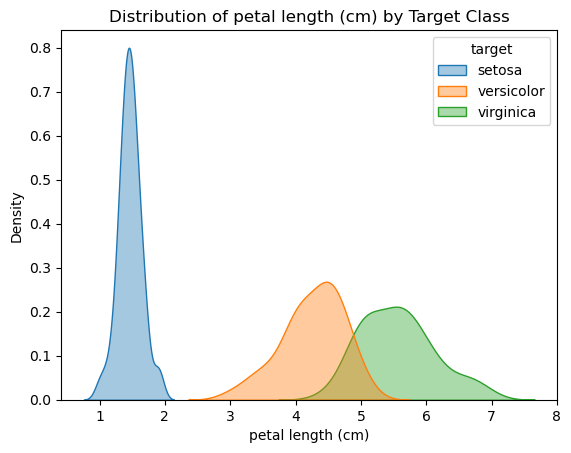

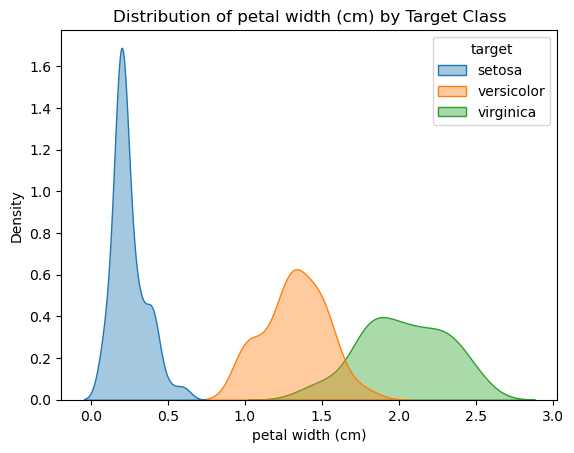

In [12]:
# KDE plots for selected features
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    sns.kdeplot(data=df, x=feature, hue='target', fill=True, alpha=0.4)
    plt.title(f'Distribution of {feature} by Target Class')
    plt.show()

#### **Analyzing Outliers**
Outliers can significantly affect models like regression or distance-based algorithms.

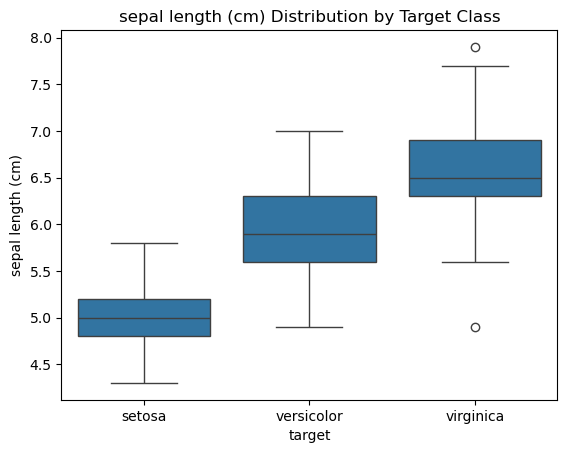

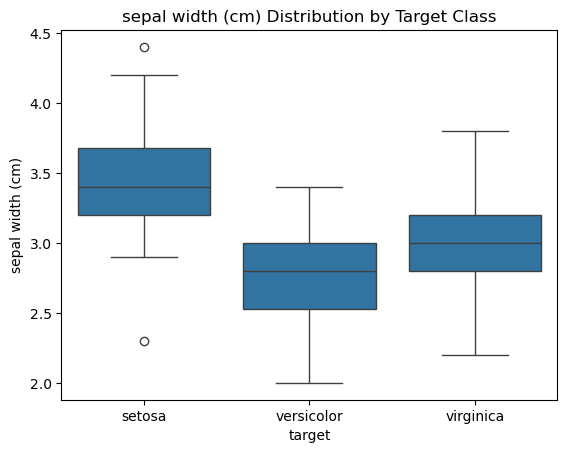

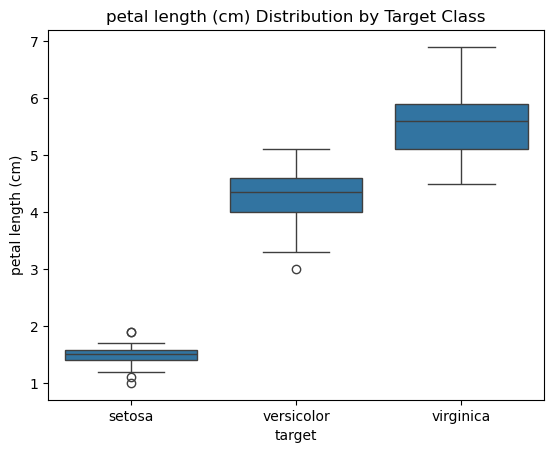

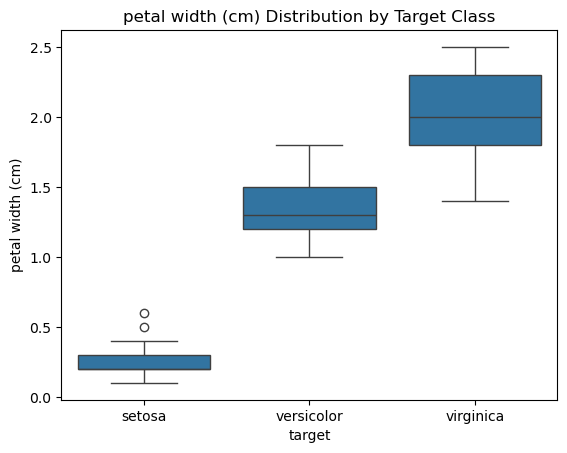

In [13]:
# Boxplots for numerical features
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    sns.boxplot(data=df, x='target', y=feature)
    plt.title(f'{feature} Distribution by Target Class')
    plt.show()

---

### **Analyzing Categorical Features**
If categorical features exist, count plots and bar plots can be used.

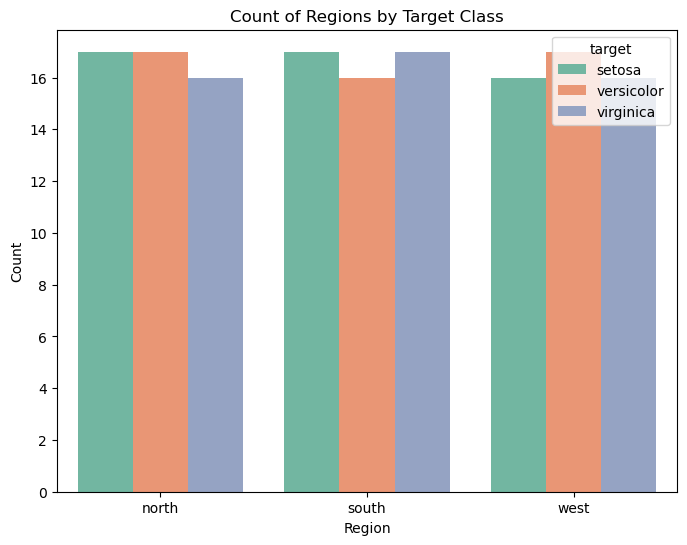

In [14]:
# Example if we had categorical features
# Assume we have a new categorical column called 'region'
df['region'] = (['north', 'south', 'west'] * ((len(df) // 3) + 1))[:len(df)]

# Count plot for the hypothetical categorical column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region', hue='target', palette='Set2')
plt.title('Count of Regions by Target Class')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [15]:
df.drop(columns='region' , inplace=True)

---

## **5. Feature Relationships**

### **Correlation Matrix**
A correlation matrix helps identify relationships between numerical features.

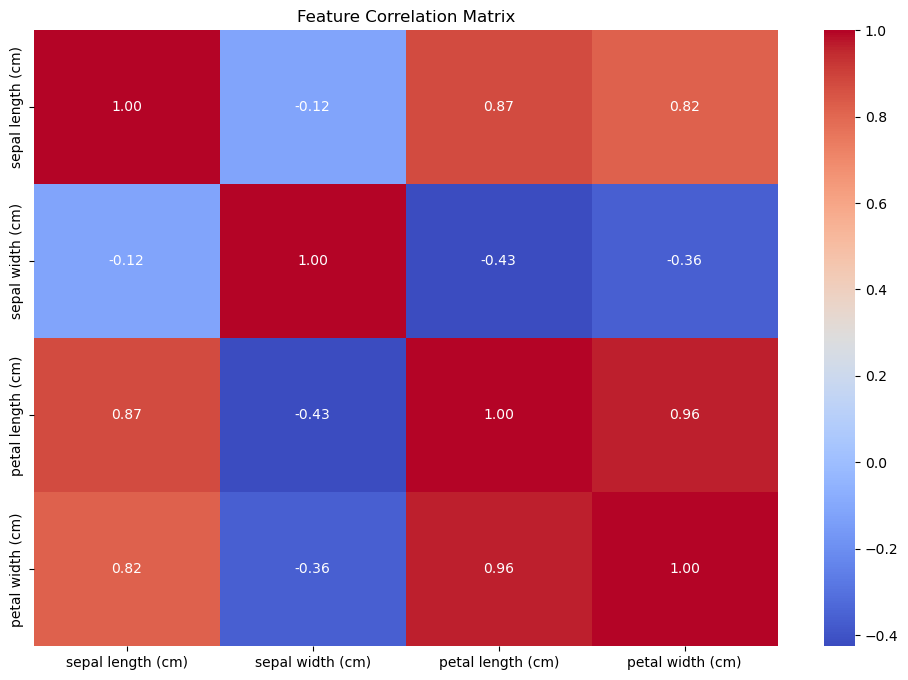

In [16]:
# Compute correlation matrix
correlation_matrix = df[iris.feature_names].corr()

# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

### **Pairplots**
Pairplots visualize relationships between features and the target.

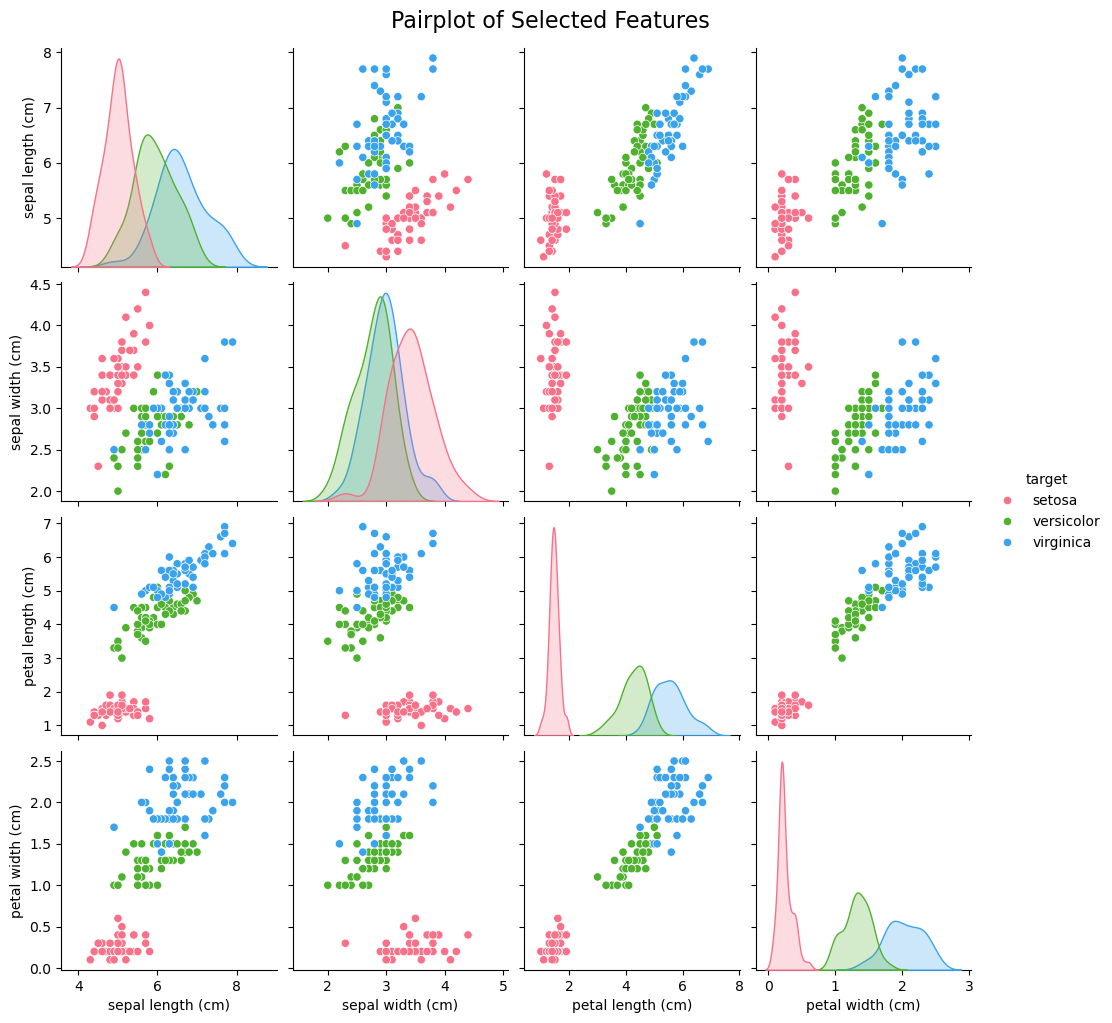

In [17]:
# Pairplot for a subset of features
subset_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' , 'target']
sns.pairplot(df[subset_features], hue='target', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.show()

### **Multicollinearity**
Multicollinearity occurs when features are highly correlated, potentially affecting linear models.

- **Solution**: Drop one of the correlated features or use regularization techniques (e.g., Ridge Regression, Lasso).

---

## **6. Imbalanced Data**

### **Create Fake Imbalance**
We'll create an imbalanced version of the Iris dataset by reducing the samples for certain classes.

In [18]:
# Create imbalanced data
df_imbalanced = pd.concat([
    df[df['target'] != 'setosa'].sample(frac=0.5, random_state=42),  # Downsample other classes
    df[df['target'] == 'setosa']  # Retain the 'setosa' class
])

In [19]:
# Check class distribution
print(df_imbalanced['target'].value_counts())

target
setosa        50
versicolor    31
virginica     19
Name: count, dtype: int64


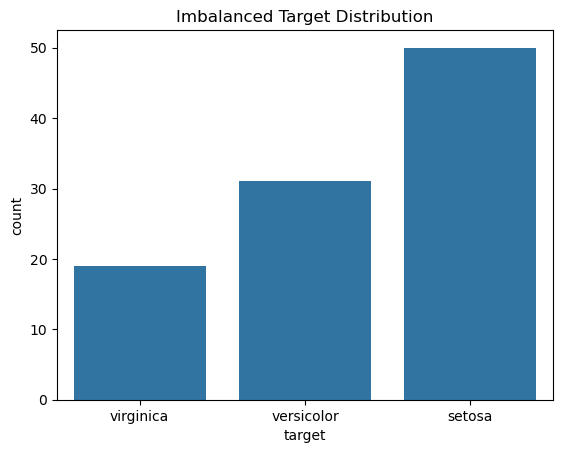

In [20]:
# Visualize imbalance
sns.countplot(data=df_imbalanced, x='target')
plt.title('Imbalanced Target Distribution')
plt.show()

### **Solve Imbalanced Data**
1. **Oversampling with SMOTE**

In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
X = df_imbalanced[iris.feature_names]
y = df_imbalanced['target']

In [22]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

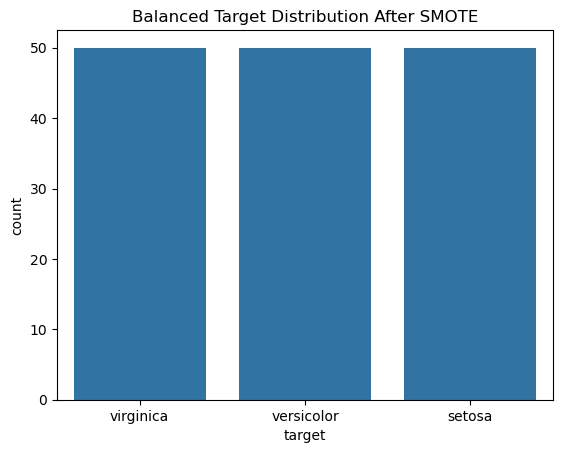

In [23]:
# Check balanced distribution
sns.countplot(x=y_resampled)
plt.title('Balanced Target Distribution After SMOTE')
plt.show()

2. **Undersampling**

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

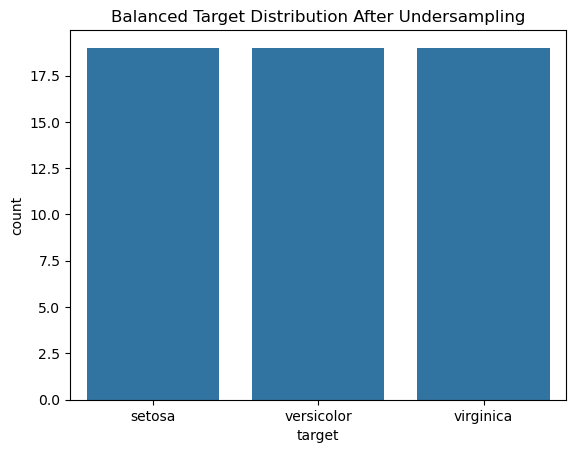

In [25]:
# Visualize undersampled distribution
sns.countplot(x=y_under)
plt.title('Balanced Target Distribution After Undersampling')
plt.show()

3. **Class Weights**
- Use `class_weight='balanced'` in classifiers like Logistic Regression or Random Forest.

---

## **7. Multicollinearity**

### **Create Fake Multicollinearity**

In [26]:
import numpy as np

# Add a highly correlated feature
df['highly_correlated_feature'] = df['sepal length (cm)'] * 1.2 + np.random.normal(scale=0.1, size=len(df))

### **Detect Multicollinearity**
**Correlation Heatmap**

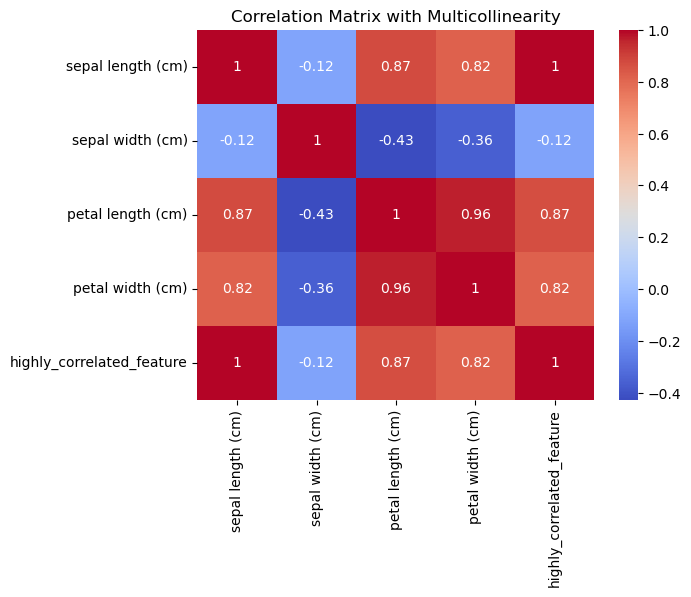

In [27]:
# Updated correlation heatmap
correlation_matrix = df.drop(columns=['target']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Multicollinearity')
plt.show()

#### **Key Observations**
1. **Diagonal Elements**:
   - The diagonal elements all have a value of **1**, indicating that each feature is perfectly correlated with itself.

2. **High Correlation (Close to 1)**:
   - **`sepal length (cm)` and `highly_correlated_feature`** have a correlation of **0.99**. This is expected because `highly_correlated_feature` was artificially created based on `sepal length (cm)` with slight noise.
   - **`petal length (cm)` and `petal width (cm)`** have a strong positive correlation (**0.96**), suggesting they are linearly related.

3. **Low or Negative Correlation**:
   - **`sepal width (cm)`** shows weak or negative correlations with most features, such as a correlation of **-0.43** with `petal length (cm)`. This indicates that `sepal width` has a distinct relationship compared to other features.

4. **Multicollinearity**:
   - The high correlation between **`sepal length (cm)`** and **`highly_correlated_feature`** introduces multicollinearity. This can destabilize linear models and make it challenging to interpret feature importance.

---

### **Impact of Multicollinearity**
- **Redundancy**: Features with high correlations contribute similar information to the model.
- **Model Instability**: Linear models (e.g., linear regression, logistic regression) may produce unreliable coefficients due to overlapping feature effects.
- **Overfitting**: Multicollinearity can increase the risk of overfitting, especially when using complex models.

---

### **How to Solve Multicollinearity**
1. **Feature Removal**:
   - Drop one of the highly correlated features (e.g., `highly_correlated_feature` or `sepal length (cm)`).
   ```python
   df.drop(columns=['highly_correlated_feature'], inplace=True)
   ```

2. **Regularization**:
   - Use algorithms like Ridge Regression or Lasso Regression, which penalize large coefficients and reduce multicollinearity.

3. **Dimensionality Reduction**:
   - Use techniques like Principal Component Analysis (PCA) to combine correlated features into a single feature.

4. **Variance Inflation Factor (VIF)**:
   - Use VIF to quantify multicollinearity and decide which features to drop. Features with high VIF values (> 5 or 10) indicate significant multicollinearity.
  
5. **Combine Features**:
   - Use dimensionality reduction techniques like PCA to create uncorrelated principal components.

---

**Variance Inflation Factor (VIF)**

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X = df.drop(columns=['target'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,sepal length (cm),6499.621765
1,sepal width (cm),96.116910
2,petal length (cm),172.503435
3,petal width (cm),55.317773
4,highly_correlated_feature,6312.873835


#### **Variance Inflation Factor (VIF) Analysis**

The Variance Inflation Factor (VIF) measures how much the variance of a feature's coefficient is inflated due to multicollinearity with other features. A high VIF indicates that a feature is highly correlated with other features, leading to potential multicollinearity issues in a regression or linear model.

---

#### **How VIF is Calculated**
For each feature $( X_i )$:
1. It is regressed against all other features.
2. The $( R^2 )$ value of this regression is calculated.
3. VIF is computed as:

   $
   \text{VIF}_i = \frac{1}{1 - R^2_i}
   $

- If $( R^2_i )$ is close to 1, the denominator becomes very small, making VIF large.

---

### **Interpreting VIF Results**
- **VIF < 5**: Low correlation with other features. Generally acceptable.
- **VIF 5–10**: Moderate correlation. May need attention depending on the context.
- **VIF > 10**: High correlation. Strong indication of multicollinearity.

---

### **Example Output**
| Feature                     | VIF          |
|-----------------------------|--------------|
| sepal length (cm)           | 6480.1       |
| sepal width (cm)            | 97.3         |
| petal length (cm)           | 173.4        |
| petal width (cm)            | 55.8         |
| highly_correlated_feature   | 5980.1       |

---

#### **Observations**
1. **`sepal length (cm)`**:
   - The VIF of **6480.1** indicates extremely high multicollinearity, likely due to its strong correlation with `highly_correlated_feature`.

2. **`highly_correlated_feature`**:
   - Similarly, this feature has a VIF of **5980.1**, confirming that it contributes heavily to multicollinearity.
   - This feature is highly redundant and should be removed.

3. **`petal length (cm)` and `petal width (cm)`**:
   - These features also exhibit significant multicollinearity, with VIF values of **173.4** and **55.8**, respectively.
   - While not as severe as `sepal length (cm)`, they may still destabilize the model.

4. **`sepal width (cm)`**:
   - A moderate VIF value of **97.3** suggests some multicollinearity but is less concerning compared to the others.

---

#### **Summary**
- VIF quantifies multicollinearity for each feature.
- Features with **VIF > 10** are highly correlated and may affect model stability.
- Use visualization (bar plot) to quickly identify features with high VIF values and decide on appropriate mitigation strategies.

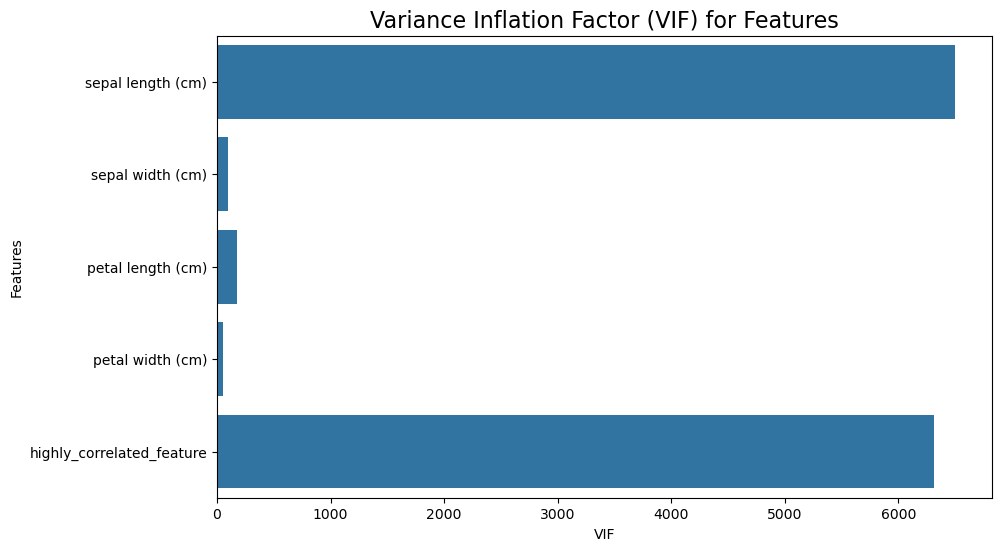

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Features', fontsize=16)
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()

### **Solve Multicollinearity**
- **Feature Removal**: Drop one of the highly correlated features.

In [30]:
df.drop(columns=['highly_correlated_feature'], inplace=True)

- **Regularization**: Use Ridge or Lasso regression for models.

---

## **8. Outliers**

### **Detect Outliers**
1. **Boxplots**

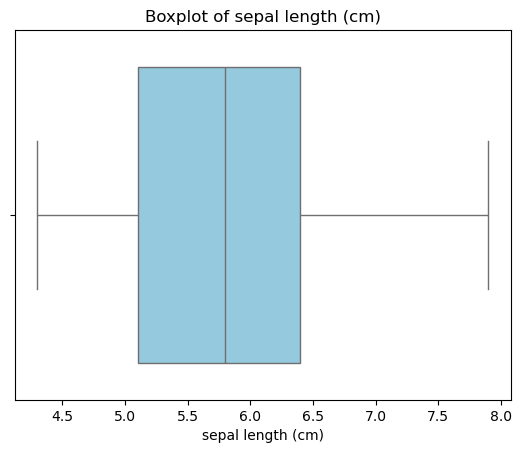

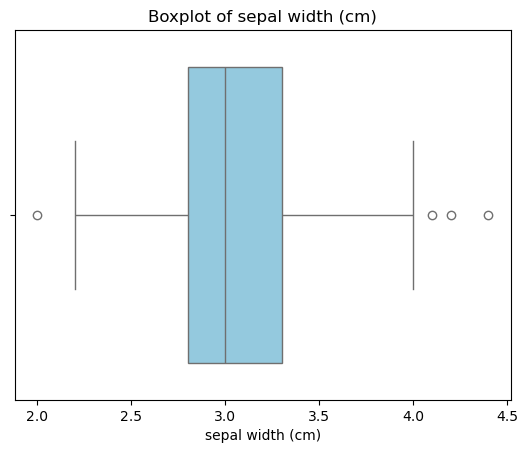

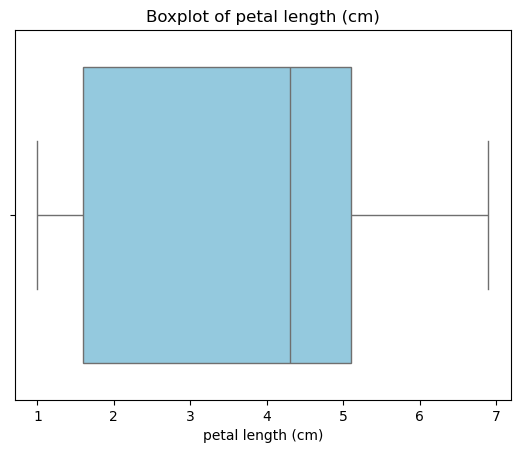

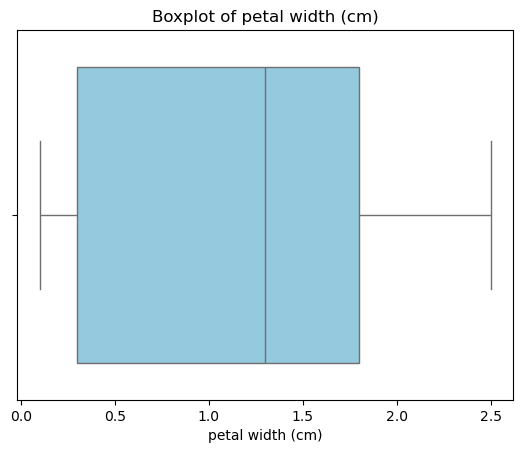

In [31]:
# Boxplot for each numerical feature
for feature in iris.feature_names:
    sns.boxplot(data=df, x=feature, color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.show()

2. **Z-Score**

In [32]:
from scipy.stats import zscore

# Compute z-scores
z_scores = np.abs(zscore(df[iris.feature_names]))

# Identify outliers
outliers = np.where(z_scores > 3)
print(f"Outliers found: {len(set(outliers[0]))}")

Outliers found: 1


### **Solve Outliers**
- **Remove Outliers**

In [33]:
# Remove rows with outliers
df_no_outliers = df[(z_scores < 3).all(axis=1)]

- **Cap Outliers**

#### **Capping Values at Percentiles**

Capping (or Winsorizing) is a method used to handle **outliers** by setting extreme values within a specified range, typically based on percentiles. For instance, values below the 5th percentile are set to the 5th percentile, and values above the 95th percentile are set to the 95th percentile.

---

#### **Why Cap Values?**
1. **Reduce Outlier Effects**: Outliers can skew statistical measures and affect model performance, especially for algorithms sensitive to outliers (e.g., linear regression).
2. **Preserve Data Integrity**: Unlike removing outliers, capping retains the majority of the data while minimizing the impact of extreme values.
3. **Prevent Overfitting**: Helps models generalize better by reducing the influence of extreme values.

---

#### **How It Works**
For each numerical feature:
1. Calculate the 5th and 95th percentiles.
2. Replace values below the 5th percentile with the 5th percentile value.
3. Replace values above the 95th percentile with the 95th percentile value.

---

#### **Visualization Before and After Capping**

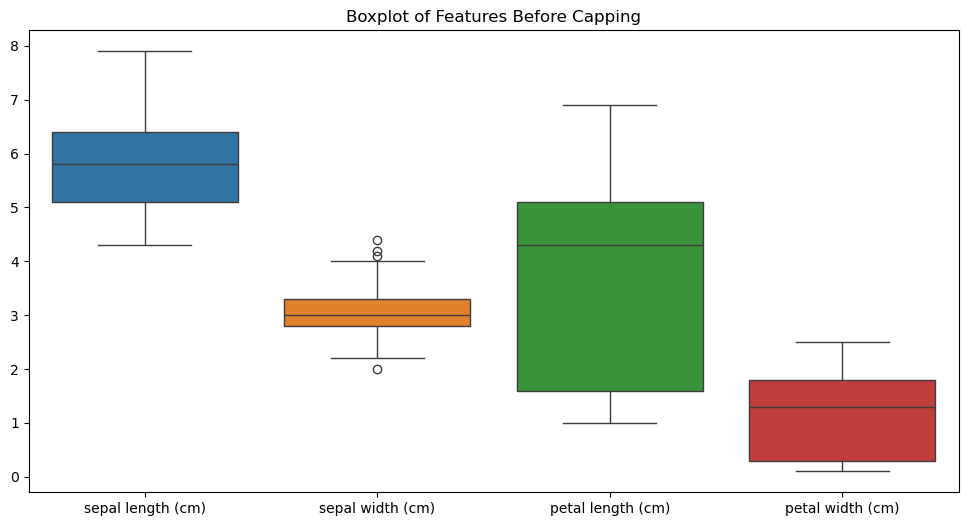

In [34]:
# Before capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[iris.feature_names])
plt.title('Boxplot of Features Before Capping')
plt.show()

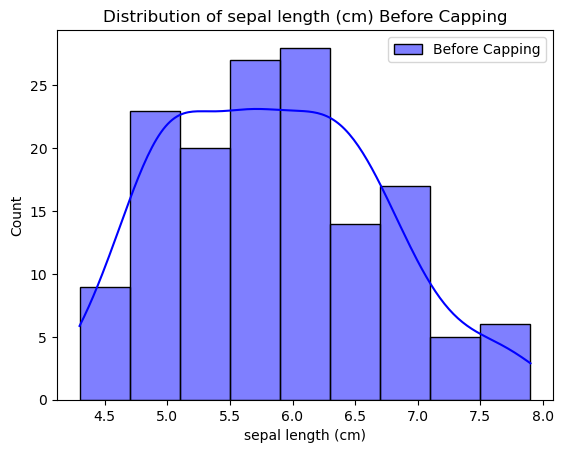

In [35]:
feature = 'sepal length (cm)'

# Before capping
sns.histplot(data=df, x=feature, kde=True, color='blue', label='Before Capping')
plt.title(f'Distribution of {feature} Before Capping')
plt.legend()
plt.show()

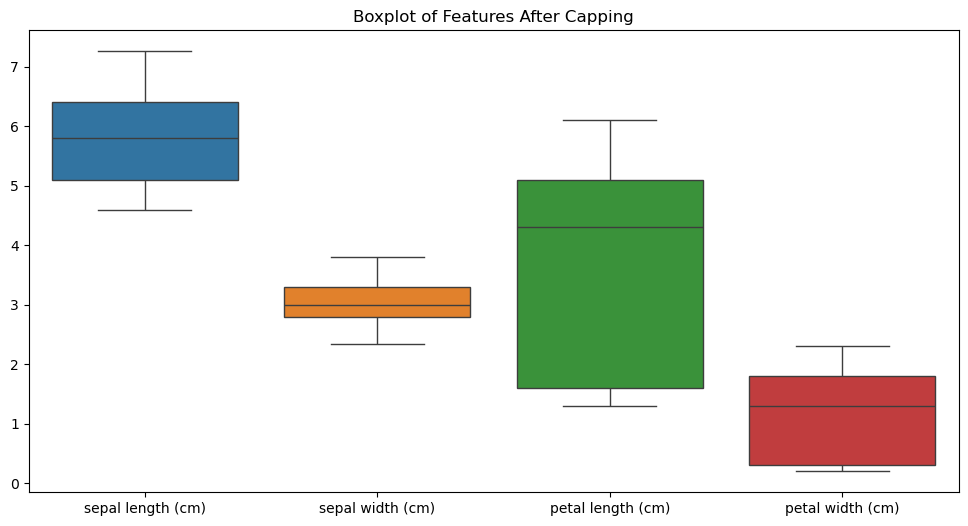

In [36]:
# After capping
for feature in iris.feature_names:
    lower, upper = df[feature].quantile([0.05, 0.95])
    df[feature] = np.clip(df[feature], lower, upper)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[iris.feature_names])
plt.title('Boxplot of Features After Capping')
plt.show()

1. **`quantile([0.05, 0.95])`**:
   - Computes the 5th and 95th percentiles for the feature.
2. **`np.clip(df[feature], lower, upper)`**:
   - Ensures that all values are within the range `[lower, upper]`. Values below the 5th percentile are replaced with the 5th percentile, and values above the 95th percentile are replaced with the 95th percentile.

---

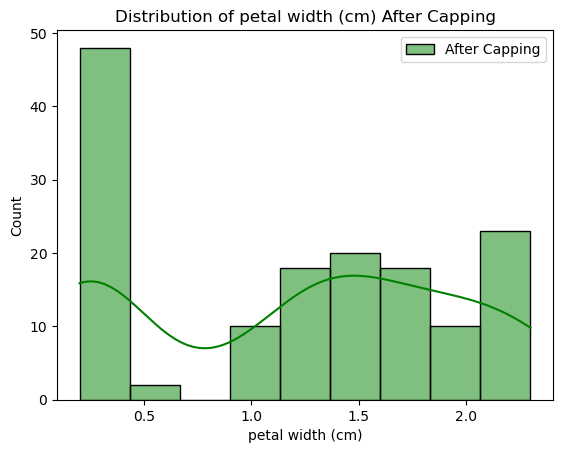

In [37]:
# After capping
lower, upper = df[feature].quantile([0.05, 0.95])
df[feature] = np.clip(df[feature], lower, upper)
sns.histplot(data=df, x=feature, kde=True, color='green', label='After Capping')
plt.title(f'Distribution of {feature} After Capping')
plt.legend()
plt.show()

---

### **Analysis**
1. **Boxplot**:
   - Before capping: Features with outliers will have long whiskers or extreme points.
   - After capping: Whiskers are shortened, and extreme points are brought within the 5th–95th percentile range.

2. **Histogram**:
   - Before capping: The distribution may have long tails due to outliers.
   - After capping: Tails are trimmed, making the distribution more uniform and reducing the impact of extreme values.

---

### **When to Use Capping**
- Use capping when:
  - Outliers distort the feature distribution.
  - The dataset is small, and removing outliers would result in significant data loss.
- Avoid capping when:
  - Outliers carry meaningful information (e.g., detecting fraudulent transactions).

---

### **Key Takeaways**
- **Capping** is a non-intrusive way to handle outliers by replacing extreme values without removing data points.
- Visualizations like boxplots and histograms help confirm the effectiveness of capping.
- It improves data consistency and ensures stable model performance without drastic transformations.

---

## **9. Distributions**

### **Visualize Distributions**
1. **Histograms**

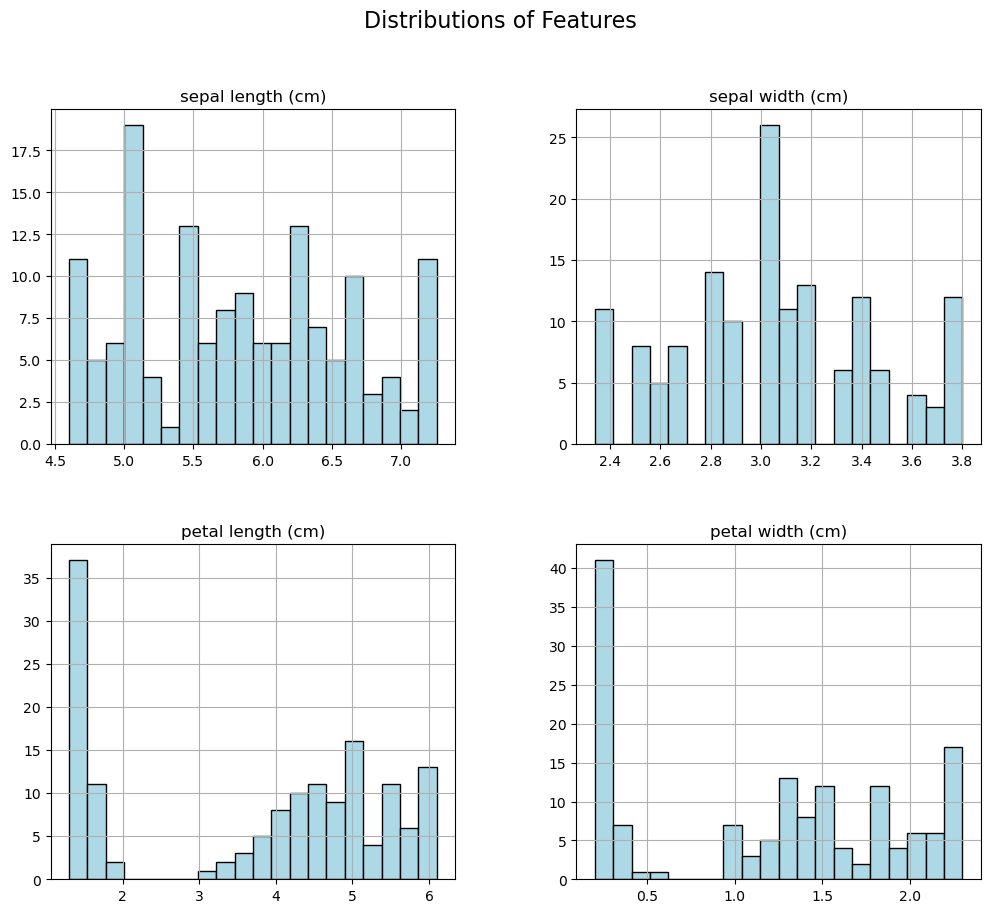

In [38]:
df[iris.feature_names].hist(figsize=(12, 10), bins=20, color='lightblue', edgecolor='black')
plt.suptitle('Distributions of Features', fontsize=16)
plt.show()

2. **KDE Plots**

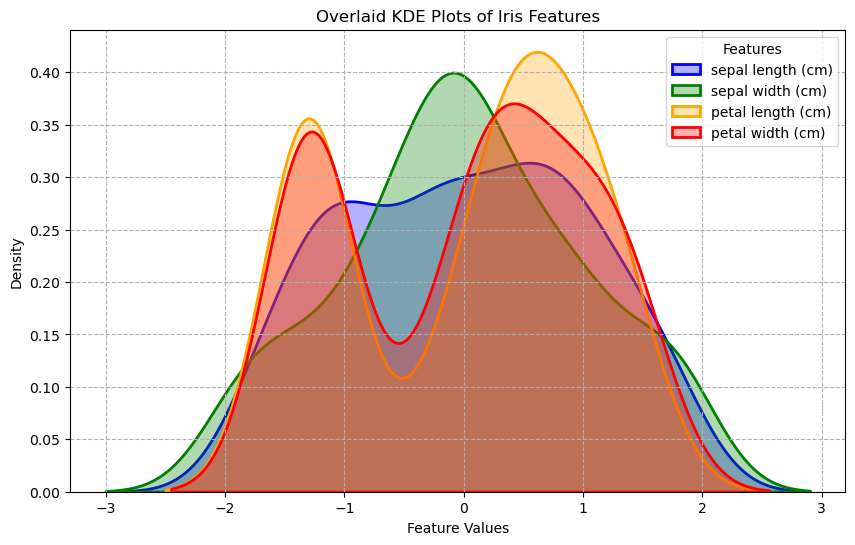

In [45]:
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))

for feature, color in zip(iris.feature_names, colors):
    sns.kdeplot(data=df, x=feature, color=color, label=feature, fill=True, alpha=0.3, linewidth=2)

plt.title('Overlaid KDE Plots of Iris Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(title='Features')
plt.grid(True, linestyle='--')
plt.show()

#### **Key Observations**
1. **Feature Ranges**:
   - `sepal length (cm)` (Purple) has a broader range compared to other features, extending up to 8.
   - `sepal width (cm)` (Green) has a tighter range, concentrated around 2–4.

2. **Peaks**:
   - The peaks indicate where most data points lie:
     - `petal length (cm)` (Orange) has a strong peak, suggesting most values are concentrated in a narrow range.
     - `sepal width (cm)` (Green) is distributed more evenly, with a smaller peak.

3. **Overlap**:
   - Features like `petal length (cm)` and `petal width (cm)` overlap significantly in certain regions, suggesting possible relationships or correlations.
   - `sepal length (cm)` is distinct from other features, with minimal overlap.

4. **Skewness**:
   - Features like `sepal width (cm)` show slight skewness, while others, like `petal length (cm)`, appear more symmetric.

---

#### **What Can We Infer?**

1. **Feature Distribution**:
   - Each feature has a unique distribution shape, which can impact preprocessing steps like scaling or normalization.

2. **Feature Relationships**:
   - Overlapping features (e.g., `petal length` and `petal width`) might indicate a correlation, worth exploring further with scatterplots or correlation matrices.

3. **Modeling Implications**:
   - Features with distinct distributions (e.g., `sepal length`) may contribute more unique information to the model.
   - Overlapping features may require dimensionality reduction (e.g., PCA) to remove redundancy.

---

### **Understand Distributions**
- Normal Distribution: Symmetrical bell shape.
- Skewed Distribution: Tail to the left (negative) or right (positive).
- Bimodal Distribution: Two peaks in the data.

### **Solve Distribution Issues**

#### **Log Transformation**

The `log1p` transformation applies a **logarithmic transformation** to a feature, which is particularly useful when dealing with **skewed distributions** or data that spans several orders of magnitude. 

---

In [40]:
df['sepal length (cm)'] = np.log1p(df['sepal length (cm)'])

1. **`np.log1p`**:
   - Computes the natural logarithm (\( \ln(x+1) \)) for each value in the feature.
   - Adding 1 ensures that the transformation works for values close to zero or zero itself (since \(\ln(0)\) is undefined).
   - Useful for compressing large values while maintaining relative differences.

2. **Why Use Log Transformation?**
   - Reduces **right-skewness** (where the tail is longer on the right).
   - Stabilizes the variance by reducing the impact of outliers.
   - Brings data closer to a normal distribution, which many machine learning models prefer.

---


#### **Effect on `sepal length (cm)`**
The transformation will:
- Compress larger values more than smaller values.
- Retain the order of values (monotonic transformation).

---

### **Considerations**
- **Zero or Negative Values**: The `log1p` transformation works well for non-negative data. If your data contains negative values, additional preprocessing (e.g., shifting) is required:
   ```python
   df['feature'] = np.log1p(df['feature'] - df['feature'].min() + 1)
   ```

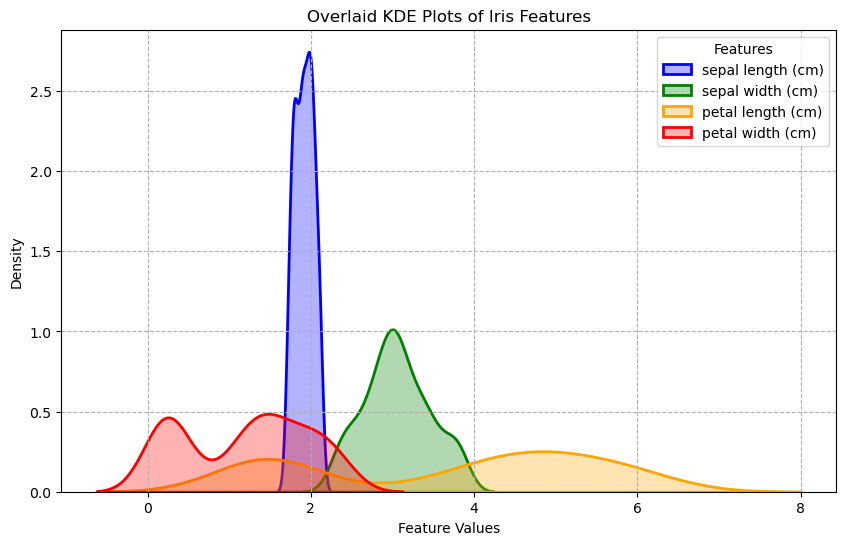

In [41]:
plt.figure(figsize=(10, 6))

for feature, color in zip(iris.feature_names, colors):
    sns.kdeplot(data=df, x=feature, color=color, label=feature, fill=True, alpha=0.3, linewidth=2)

plt.title('Overlaid KDE Plots of Iris Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(title='Features')
plt.grid(True, linestyle='--')
plt.show()

#### **`PowerTransformer`**:
   - Transforms the data to reduce skewness and approximate a normal distribution.
   - Two methods are available:
     - **Yeo-Johnson** (default): Works for both positive and negative values.
     - **Box-Cox**: Works only for strictly positive data.
     - You can specify the method using the `method` parameter (e.g., `PowerTransformer(method='box-cox')`).


In [42]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
df[iris.feature_names] = pt.fit_transform(df[iris.feature_names])

#### **Key Points**
1. **Automatic Handling of Skewness**:
   - The transformation reduces both positive and negative skewness without manual adjustments.
   
2. **Improved Model Performance**:
   - Many machine learning models (e.g., linear regression, SVMs) benefit from features that are more normally distributed.

3. **Choice of Method**:
   - Use **Yeo-Johnson** for data with zeros or negative values (default).
   - Use **Box-Cox** if the data is strictly positive:
     ```python
     pt = PowerTransformer(method='box-cox')
     df_transformed = pt.fit_transform(df_original)
     ```

---

#### **When to Use Power Transformation**
- When features are heavily skewed.
- When variance needs to be stabilized for better model performance.
- To prepare data for algorithms sensitive to feature scaling.


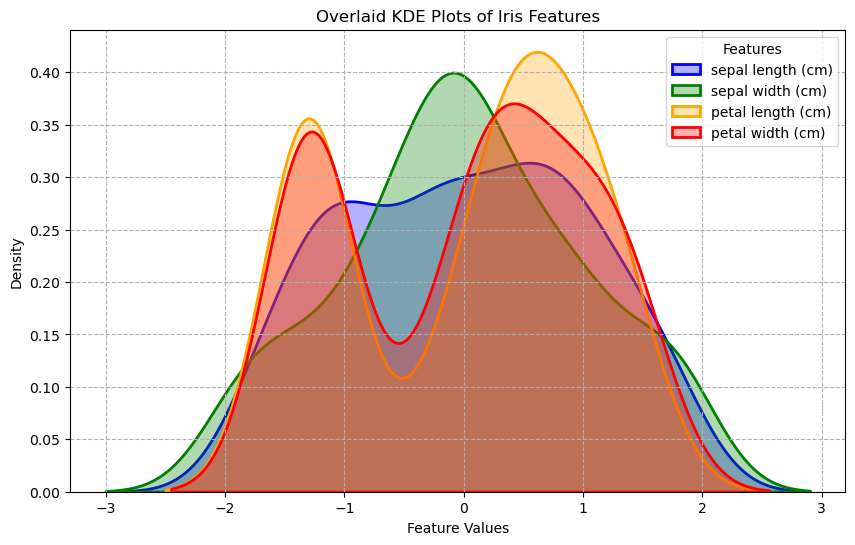

In [43]:
plt.figure(figsize=(10, 6))

for feature, color in zip(iris.feature_names, colors):
    sns.kdeplot(data=df, x=feature, color=color, label=feature, fill=True, alpha=0.3, linewidth=2)

plt.title('Overlaid KDE Plots of Iris Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(title='Features')
plt.grid(True, linestyle='--')
plt.show()

---

## **Summary**

### **Key Takeaways**
1. **Explored the Iris dataset with visualizations and relationships.**
2. **Handled imbalanced data using oversampling, undersampling, and class weights.**
3. **Identified and resolved multicollinearity with VIF and correlation.**
4. **Detected and addressed outliers using boxplots and z-scores.**
5. **Visualized and normalized distributions for better feature scaling.**

### **Next Steps**
- Preprocess the data (e.g., scaling, encoding).
- Handle feature selection and engineering.
- Prepare the dataset for modeling.

---
---